In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

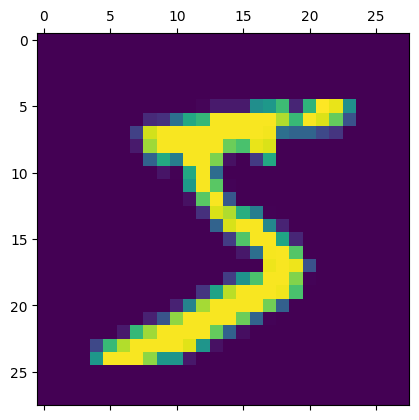

In [4]:
plt.matshow(X_train[0])

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [7]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [8]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.10),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(64, activation='relu'),
    Dropout(0.25),

    Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='Adamax',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 20s 4ms/step - loss: 0.5649 - accuracy: 0.8199
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2074 - accuracy: 0.9388
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1527 - accuracy: 0.9563
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1246 - accuracy: 0.9640
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1100 - accuracy: 0.9692


In [10]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0428 - accuracy: 0.9865


[0.04276581108570099, 0.9865000247955322]

In [11]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

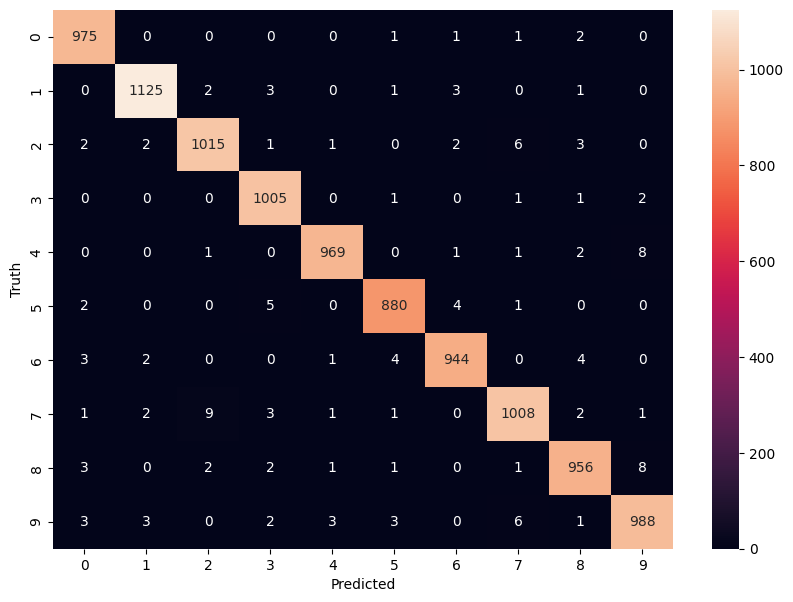

In [12]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')